In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [246]:
df = pd.read_csv("../Datasets/courses.csv")
df.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [247]:
df_original = df.copy(deep = True)
df.shape

(290, 23)

In [248]:
df.drop(["Honor Code Certificates","% Certified of > 50% Course Content Accessed", "Total Course Hours (Thousands)"], axis = 1, inplace=True)

In [249]:
df.shape

(290, 20)

*Remove non-float value*

In [250]:
df[df["% Played Video"] == '---']

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
9,HarvardX,ER22x,03/02/2013,Justice,Michael Sandel,"Humanities, History, Design, Religion, and Edu...",1,58779,9425,5438,16.05,9.26,---,21.86,20.98,13.67,30.0,60.42,39.58,69.78


In [251]:
df.at[9, "% Played Video"] = 0.

In [252]:
df.astype({"% Played Video":"float64"}).dtypes

Institution                                 object
Course Number                               object
Launch Date                                 object
Course Title                                object
Instructors                                 object
Course Subject                              object
Year                                         int64
Participants (Course Content Accessed)       int64
Audited (> 50% Course Content Accessed)      int64
Certified                                    int64
% Audited                                  float64
% Certified                                float64
% Played Video                             float64
% Posted in Forum                          float64
% Grade Higher Than Zero                   float64
Median Hours for Certification             float64
Median Age                                 float64
% Male                                     float64
% Female                                   float64
% Bachelor's Degree or Higher  

In [253]:
df["% Played Video"] = [float(val) for val in df["% Played Video"]]

In [254]:
df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', 'Year',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       '% Certified', '% Played Video', '% Posted in Forum',
       '% Grade Higher Than Zero', 'Median Hours for Certification',
       'Median Age', '% Male', '% Female', '% Bachelor's Degree or Higher'],
      dtype='object')

In [255]:
df.shape

(290, 20)

In [256]:
len(set(df["Course Number"]))

188

In [257]:
df[df["Instructors"].isnull()]

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
221,HarvardX,CS50x,01/01/2016,Introduction to Computer Science (2016),NaN,Computer Science,4,168335,10245,417,6.09,0.25,69.02,0.0,0.0,0.0,23.0,77.44,22.56,49.51


*Deal with NaN value in Instructors' list*

In [258]:
df.at[221, "Instructors"] = ""

## Combine Rows for the Same Course ##

In [259]:
course_occurences = df["Course Number"].value_counts()
course_occurences

6.00.1x       9
3.091x        7
6.002x        5
6.00.2x       5
14.73x        4
             ..
8.421.3x      1
21W.789.3x    1
MCB64.1x      1
18.01.2x      1
8.421.2x      1
Name: Course Number, Length: 188, dtype: int64

In [260]:
# Define function to combine duplicate records

test_course = "6.00.1x"

def combine_course_instances(course, df=df):
    '''
        Combines multiple instances of the same course preserving original launch dates, combini
        the list of all instructors, and either summing or averaging course statistics, as appropriate.
        
        Inputs:
            - course: course code attached to multiple entries
            - df: dataframe in which the course exists
    
    '''
    instances = df[df["Course Number"]==course]
    #print( instances["Instructors"])
#     print(instances)
    
    # Keep first record of launch date and course title
    institution = list(instances["Institution"])[0]
    course_title = list(instances["Course Title"])[0]
    launch_date = list(instances["Launch Date"])[0]
    
    row = instances.groupby("Course Number").agg({
                                            "Institution": lambda x: institution,
                                            "Course Number": lambda x: course,
                                            "Launch Date": lambda x: launch_date,
                                            "Course Title": lambda x: course_title,
                                            "Instructors": lambda x: get_instructors(instances["Instructors"]),
                                            "Course Subject": lambda x :list(instances["Course Subject"])[0],
                                            "Year":"max",
                                            "Participants (Course Content Accessed)": "sum",
                                            "Certified": "sum",
                                            "Audited (> 50% Course Content Accessed)": "mean",
                                            "Certified": "sum",
                                            "% Audited": "mean",
                                            "% Certified": "mean",
                                            "% Played Video": "mean",
                                            "% Posted in Forum": "mean",
                                            "% Grade Higher Than Zero": "mean",
                                            "Median Hours for Certification": "mean",
                                            "Median Age": "mean",
                                            "% Male": "mean",
                                            "% Female": "mean",
                                            "% Bachelor's Degree or Higher": "mean"
    })
#     print(row)
    return row

def get_instructors(combined_instructors):
    
    '''
        Converts a list of all instructor records into a list of individually separated,
        unique instructor names.
        
        Input:
            - combined_instructors: list containing combined instructor names for one or more
                                    instances of a course
        
        Output:
            - instructors_list: list of unique instructor names across all instances of a course
    '''
    
    # Define empty list to store individual instructors
    instructors_list = []
    
    # Build complete list of instructors
    for cluster in combined_instructors:
        # Store instructors temporarily
        temp_list = cluster.split(',')
        
        # Remove possible spaces at the beginning and
        #    add to list if name not already included
        for instructor in temp_list:
            inst = re.sub(r"(^\s?)", "", instructor)    # remove leading space
            # Append value only if it does not already exist
            if inst not in instructors_list:
                instructors_list.append(inst)
                
#     print(full_list)
    return instructors_list

In [261]:
# to keep: institution, launch date, course title, instructors, course subject

In [262]:
# Formula to isolate index in df by course number
# df.loc[df["Course Number"] == "3.15.3x"].index[0]

## Designate Duplicate and Unique Courses ##

In [263]:
# duplicate_courses = [course for course in course_occurences.keys() if course_occurences[course]>1]
# # duplicate_courses
# len(duplicate_courses)

In [264]:
# unique_courses = [course for course in course_occurences.keys() if course_occurences[course]==1]
# # unique_courses
# len(unique_courses)

In [265]:
duplicate_courses = [course for course in course_occurences.keys() if course_occurences[course]>1]
len(duplicate_courses)

66

## Create DF with duplicate courses combined ##

In [266]:
final_df = pd.DataFrame(columns=df.columns)
final_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher


In [267]:
len(final_df.columns)

20

In [268]:
final_df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', 'Year',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       '% Certified', '% Played Video', '% Posted in Forum',
       '% Grade Higher Than Zero', 'Median Hours for Certification',
       'Median Age', '% Male', '% Female', '% Bachelor's Degree or Higher'],
      dtype='object')

In [269]:
# Check function for all duplicate courses
for course in duplicate_courses:
    new_row = combine_course_instances(course)
#     print(new_row)
    final_df = pd.concat([final_df, new_row], ignore_index=True)
#     final_df.loc[len(final_df), df.columns] = pd.DataFrame.from_records(list(new_row))

In [270]:
final_df.shape

(66, 20)

In [271]:
final_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.00.1x,10/16/2013,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,364099,6584.666667,29412,17.018889,8.252222,72.924444,8.640000,44.654444,60.734444,26.333333,81.753333,18.246667,63.575556
1,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4,56421,847.000000,3608,8.805714,4.840000,73.691429,8.097143,22.082857,95.955714,26.142857,74.007143,25.992857,58.424286
2,MITx,6.002x,09/05/2012,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",3,116335,2131.000000,5169,8.432000,4.010000,71.438000,4.884000,16.932000,82.980000,25.200000,88.522000,11.478000,57.666000
3,MITx,6.00.2x,03/05/2014,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,66102,2372.400000,6446,18.022000,9.842000,69.172000,6.984000,30.702000,56.604000,28.000000,86.250000,13.750000,74.190000
4,MITx,14.73x,02/12/2013,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",4,52060,2434.250000,6670,15.580000,10.285000,71.565000,9.397500,31.895000,57.370000,28.500000,52.722500,47.277500,79.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,HarvardX,PH525.7x,04/27/2015,"Data Analysis for Genomics: Case study, ChIP S...",[Rafael Irizarry],"Government, Health, and Social Science",4,3966,1173.000000,264,55.440000,5.965000,50.310000,2.410000,12.805000,19.235000,29.000000,65.485000,34.515000,87.390000
62,HarvardX,GSE2x,07/08/2014,Leaders of Learning,[Richard Elmore],"Humanities, History, Design, Religion, and Edu...",4,46548,4511.500000,4144,17.060000,6.390000,72.095000,17.530000,16.350000,13.585000,31.000000,51.595000,48.405000,78.250000
63,HarvardX,SW12.8x,10/09/2014,Creating China: The Birth of a Nation,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",4,4937,1138.000000,1584,46.170000,23.570000,75.790000,22.840000,32.160000,10.875000,33.500000,63.210000,36.790000,81.185000
64,MITx,6.004.1x,03/03/2015,Computation Structures: Digital Circuits,"[Chris Terman, Steve Ward, Silvina Hanono Wach...",Computer Science,4,31624,2136.500000,1182,13.545000,3.760000,63.610000,2.855000,11.000000,72.535000,25.000000,88.435000,11.565000,57.415000


In [272]:
final_df.reset_index()

,index,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,0,MITx,6.00.1x,10/16/2013,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,364099,6584.666667,...,17.018889,8.252222,72.924444,8.640000,44.654444,60.734444,26.333333,81.753333,18.246667,63.575556
1,1,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4,56421,847.000000,...,8.805714,4.840000,73.691429,8.097143,22.082857,95.955714,26.142857,74.007143,25.992857,58.424286
2,2,MITx,6.002x,09/05/2012,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",3,116335,2131.000000,...,8.432000,4.010000,71.438000,4.884000,16.932000,82.980000,25.200000,88.522000,11.478000,57.666000
3,3,MITx,6.00.2x,03/05/2014,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,4,66102,2372.400000,...,18.022000,9.842000,69.172000,6.984000,30.702000,56.604000,28.000000,86.250000,13.750000,74.190000
4,4,MITx,14.73x,02/12/2013,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",4,52060,2434.250000,...,15.580000,10.285000,71.565000,9.397500,31.895000,57.370000,28.500000,52.722500,47.277500,79.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,HarvardX,PH525.7x,04/27/2015,"Data Analysis for Genomics: Case study, ChIP S...",[Rafael Irizarry],"Government, Health, and Social Science",4,3966,1173.000000,...,55.440000,5.965000,50.310000,2.410000,12.805000,19.235000,29.000000,65.485000,34.515000,87.390000
62,62,HarvardX,GSE2x,07/08/2014,Leaders of Learning,[Richard Elmore],"Humanities, History, Design, Religion, and Edu...",4,46548,4511.500000,...,17.060000,6.390000,72.095000,17.530000,16.350000,13.585000,31.000000,51.595000,48.405000,78.250000
63,63,HarvardX,SW12.8x,10/09/2014,Creating China: The Birth of a Nation,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",4,4937,1138.000000,...,46.170000,23.570000,75.790000,22.840000,32.160000,10.875000,33.500000,63.210000,36.790000,81.185000
64,64,MITx,6.004.1x,03/03/2015,Computation Structures: Digital Circuits,"[Chris Terman, Steve Ward, Silvina Hanono Wach...",Computer Science,4,31624,2136.500000,...,13.545000,3.760000,63.610000,2.855000,11.000000,72.535000,25.000000,88.435000,11.565000,57.415000


## Designate unique courses and add to unique_courses_df ##

In [274]:
unique_courses = [course for course in course_occurences.keys() if course_occurences[course]==1]
#unique_courses

In [275]:
unique_courses_df = pd.DataFrame(columns=df.columns)
#unique_courses_df

In [276]:
for course in unique_courses:
    #print(dict(df[df["Course Number"]==course]))
    #unique_courses_df = unique_courses_df.append((df[df["Course Number"]==course]))
    unique_courses_df.loc[len(unique_courses_df)] = df.loc[df.loc[df["Course Number"]==course].index[0]]

In [277]:
unique_courses_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,HarvardX,HUM2.4x,10/22/2014,The Ancient Greek Hero in 24 Hours (Hours 16-2...,Gregory Nagy,"Humanities, History, Design, Religion, and Edu...",3,1615,617,376,38.35,23.37,40.89,4.60,31.95,1.42,33.0,50.28,49.72,68.89
1,HarvardX,PH525x,04/07/2014,Data Analysis for Genomics,Rafael Irizarry,"Government, Health, and Social Science",2,13708,3620,651,26.43,4.75,70.94,3.77,34.62,25.79,31.0,67.66,32.34,89.69
2,MITx,6.SFMx,04/08/2014,Street Fighting Math,"Sanjoy Mahajan, Isaac Chuang","Science, Technology, Engineering, and Mathematics",2,27882,3464,567,12.42,2.03,66.49,5.74,20.52,28.32,29.0,84.17,15.83,66.85
3,MITx,0.111x,06/15/2015,Making Science and Engineering Pictures: A Pra...,Felice Frankel,"Science, Technology, Engineering, and Mathematics",3,6934,1456,126,21.00,1.82,69.44,9.97,3.95,24.54,29.0,68.95,31.05,76.69
4,HarvardX,PH556x,01/20/2016,Practical Improvement Science in Health Care: ...,"Don Goldmann, Dave Williams, Don Berwick","Government, Health, and Social Science",4,6792,2767,903,40.74,13.30,57.14,35.28,44.38,9.39,40.0,37.24,62.76,91.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,MITx,8.421.3x,11/16/2015,Atomic and Optical Physics: Atom-Light Interac...,"Wolfgang Ketterle, David E. Pritchard, Isaac C...","Science, Technology, Engineering, and Mathematics",4,790,290,63,36.71,7.97,55.06,6.58,17.09,56.85,26.0,87.20,12.80,71.74
118,MITx,21W.789.3x,03/28/2016,Mobile Application Experiences: Building Mobil...,"Frank Bentley, Ed Barrett",Computer Science,4,4276,1000,9,23.39,0.21,52.78,1.29,5.00,14.64,25.0,82.65,17.35,63.35
119,HarvardX,MCB64.1x,05/25/2016,Cell Biology: Mitochondria,Rob Lue,"Science, Technology, Engineering, and Mathematics",4,8297,1933,268,23.30,3.23,74.58,11.29,3.25,18.06,28.0,53.86,46.14,63.20
120,MITx,18.01.2x,12/01/2015,Calculus: Integration,David Jerison,"Science, Technology, Engineering, and Mathematics",4,7260,1216,336,16.75,4.63,59.39,5.99,17.41,170.68,25.0,81.46,18.54,51.52


In [278]:
# Apply same function to courses that have only one instance
get_instructors([df.iloc[12]["Instructors"]])

['Greg Nagy', 'L.Muellner']

In [279]:
# Reformat "Instructors" column

# Loop through all unique records and re-assign reformatted instructors list
for i in range(len(unique_courses_df)):
    unique_courses_df.at[i, "Instructors"] = get_instructors([df.iloc[i]["Instructors"]])

In [280]:
unique_courses_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,HarvardX,HUM2.4x,10/22/2014,The Ancient Greek Hero in 24 Hours (Hours 16-2...,[Khurram Afridi],"Humanities, History, Design, Religion, and Edu...",3,1615,617,376,38.35,23.37,40.89,4.60,31.95,1.42,33.0,50.28,49.72,68.89
1,HarvardX,PH525x,04/07/2014,Data Analysis for Genomics,"[Eric Grimson, John Guttag, Chris Terman]","Government, Health, and Social Science",2,13708,3620,651,26.43,4.75,70.94,3.77,34.62,25.79,31.0,67.66,32.34,89.69
2,MITx,6.SFMx,04/08/2014,Street Fighting Math,[Michael Cima],"Science, Technology, Engineering, and Mathematics",2,27882,3464,567,12.42,2.03,66.49,5.74,20.52,28.32,29.0,84.17,15.83,66.85
3,MITx,0.111x,06/15/2015,Making Science and Engineering Pictures: A Pra...,"[David Malan, Nate Hardison, Rob Bowden, Tommy...","Science, Technology, Engineering, and Mathematics",3,6934,1456,126,21.00,1.82,69.44,9.97,3.95,24.54,29.0,68.95,31.05,76.69
4,HarvardX,PH556x,01/20/2016,Practical Improvement Science in Health Care: ...,"[Earl Francis Cook, Marcello Pagano]","Government, Health, and Social Science",4,6792,2767,903,40.74,13.30,57.14,35.28,44.38,9.39,40.0,37.24,62.76,91.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,MITx,8.421.3x,11/16/2015,Atomic and Optical Physics: Atom-Light Interac...,[Paul Peterson],"Science, Technology, Engineering, and Mathematics",4,790,290,63,36.71,7.97,55.06,6.58,17.09,56.85,26.0,87.20,12.80,71.74
118,MITx,21W.789.3x,03/28/2016,Mobile Application Experiences: Building Mobil...,[Dimitar Sasselov],Computer Science,4,4276,1000,9,23.39,0.21,52.78,1.29,5.00,14.64,25.0,82.65,17.35,63.35
119,HarvardX,MCB64.1x,05/25/2016,Cell Biology: Mitochondria,[Eugene Fitzgerald],"Science, Technology, Engineering, and Mathematics",4,8297,1933,268,23.30,3.23,74.58,11.29,3.25,18.06,28.0,53.86,46.14,63.20
120,MITx,18.01.2x,12/01/2015,Calculus: Integration,[Barton Zwiebach],"Science, Technology, Engineering, and Mathematics",4,7260,1216,336,16.75,4.63,59.39,5.99,17.41,170.68,25.0,81.46,18.54,51.52


# Combine DFs #

In [281]:
final_df = pd.concat([final_df, unique_courses_df])

In [282]:
final_df = final_df.reset_index()

In [283]:
final_df.columns

Index(['index', 'Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', 'Year',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       '% Certified', '% Played Video', '% Posted in Forum',
       '% Grade Higher Than Zero', 'Median Hours for Certification',
       'Median Age', '% Male', '% Female', '% Bachelor's Degree or Higher'],
      dtype='object')

# TEXT PRE-PROCESSING #

In [284]:
# Import text processing libraries
import nltk
import re

In [285]:
CB_df = final_df[["Institution","Course Number", "Course Title", "Instructors", "Course Subject"]].copy()

In [286]:
# add % certified
# !!! IN NEXT ITERATION ADD TO CELL ABOVE!!!

CB_df["certification_rate"] = final_df["% Certified"]
CB_df.tail()

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate
183,MITx,8.421.3x,Atomic and Optical Physics: Atom-Light Interac...,[Paul Peterson],"Science, Technology, Engineering, and Mathematics",7.97
184,MITx,21W.789.3x,Mobile Application Experiences: Building Mobil...,[Dimitar Sasselov],Computer Science,0.21
185,HarvardX,MCB64.1x,Cell Biology: Mitochondria,[Eugene Fitzgerald],"Science, Technology, Engineering, and Mathematics",3.23
186,MITx,18.01.2x,Calculus: Integration,[Barton Zwiebach],"Science, Technology, Engineering, and Mathematics",4.63
187,MITx,8.421.2x,Atomic and Optical Physics: Atomic structure a...,[Peter Galison],"Science, Technology, Engineering, and Mathematics",7.98


In [287]:
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,8.252222
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4.840000
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",4.010000
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,9.842000
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",10.285000


In [288]:
# DEFINE FUNCTIONS FOR TEXT PRE-PROCESSING

# Stop words list
stopwords_list = ['the','a','an', 'and','or','for','so','as','either','or', 'to', 
                  'of', 'in', 'on', 'i','me','its', 'they', 'them', 'he', 'she''after',
                  'where', 'unless','whether','because','since','until','before','when',
                  'while', 'which', 'whose', 'this','that', 'those','these', 'with', 
                  'at','by','down','during', 'for','from','in','into','of','off','on','over', 'past']


# Remove punctuation/special characters
def clean_text(text):
    '''
        Function that removes punctuation and special characters
        
        Input: 
             String of text
        
        Output: 
            String of text with punctuation and special characters removed
    '''

    
    # Define punctuation
    hyph = r"(\s+\-+|\–+\s+)"   # remove dashes only if accompanied by spaces; account for different lengths of dashes
    punct = r"[:;,\.!?]" 
 
    
    sp_char = r"[%\^\&\$#@\*\+\[\]\(\)\\\/\_\"\'\’]"
    
    # Set to lower case
    text = text.lower()

    # Remove dashes and replace with space
    cleaned_text = re.sub(hyph, " ", text)
    
    # Remove punctuation
    cleaned_text = re.sub(punct, "", cleaned_text)
    
    # Remove special characters
    cleaned_text = re.sub(sp_char, "", cleaned_text)

    
    return cleaned_text
    

def remove_stopwords(tokens, stopwords=stopwords_list):
    '''
        Function that removes stop words from a tokenized text.
        
        Input:
            List of tokens
            
        Output:
            List of tokens with stopwords removed
            
    '''
    
    filtered_tokens = [token for token in tokens if token not in stopwords]
    
    return list(set(filtered_tokens))
    
# #clean_text('the ancient greek hero in 24 hours (hours 12-15): cult of heroes')
# clean_text('atomic and optical physics: atom-light interactions 1 s-- matrix elements and quantized field')

In [289]:
# combine genre and title: https://ybshankar010.medium.com/from-genres-to-conversations-next-gen-movie-recommendations-with-llms-6041aab6defa
subj_codes = {
    'cs': 'Computer Science',
    'ghss': 'Government, Health, and Social Science',
    'hhdre': 'Humanities, History, Design, Religion, and Education',
    'stem': 'Science, Technology, Engineering, and Mathematics'
}


def assign_subject_code (subj, codes_dict = subj_codes):
    '''
        Assign codes to subject
        
        Inputs:
            - subj: specific subject listed in database
            - codes_dict: dictionary containing subject codes and full subject names
            
        Outputs:
            - course code
    
    '''
    
    for code, subject in codes_dict.items():
        if subject == subj:
            return code

## Convert titles to tokens ##

In [290]:
titles = CB_df["Course Title"]
titles

0       Introduction to Computer Science and Programming
1                  Introduction to Solid State Chemistry
2                               Circuits and Electronics
3      Introduction to Computational Thinking and Dat...
4                       The Challenges of Global Poverty
                             ...                        
183    Atomic and Optical Physics: Atom-Light Interac...
184    Mobile Application Experiences: Building Mobil...
185                           Cell Biology: Mitochondria
186                                Calculus: Integration
187    Atomic and Optical Physics: Atomic structure a...
Name: Course Title, Length: 188, dtype: object

In [294]:
clean_titles = [clean_text(title) for title in titles]
#clean_titles

In [293]:
tokenized_titles = [nltk.word_tokenize(title) for title in clean_titles]
#tokenized_titles

In [295]:
filtered_tokens = [remove_stopwords(title) for title in tokenized_titles]
#filtered_tokens

## Convert subject codes to tokens ##

In [296]:
CB_df["subj_codes"] = [assign_subject_code(subject) for subject in CB_df["Course Subject"]]
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate,subj_codes
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,8.252222,cs
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4.840000,stem
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",4.010000,stem
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,9.842000,cs
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",10.285000,ghss


## Combine subject codes and titles ##

In [297]:
# flatten zip: https://stackoverflow.com/questions/40709321/python-flattening-a-zip
# augmented_tokens = zip(filtered_tokens, list(df['subj_codes']))
# [list((*a, b)) for a, b in zip(filtered_tokens, list(df['subj_codes']))]

In [298]:
# flatten zip: https://stackoverflow.com/questions/40709321/python-flattening-a-zip
CB_df["title_and_subject"]= [list((*a, b)) for a, b in zip(filtered_tokens, list(CB_df['subj_codes']))]
CB_df.head()

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate,subj_codes,title_and_subject
0,MITx,6.00.1x,Introduction to Computer Science and Programming,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,8.252222,cs,"[computer, introduction, programming, science,..."
1,MITx,3.091x,Introduction to Solid State Chemistry,[Michael Cima],"Science, Technology, Engineering, and Mathematics",4.840000,stem,"[introduction, state, solid, chemistry, stem]"
2,MITx,6.002x,Circuits and Electronics,"[Khurram Afridi, Tania Khanna, Anant Agarwal, ...","Science, Technology, Engineering, and Mathematics",4.010000,stem,"[electronics, circuits, stem]"
3,MITx,6.00.2x,Introduction to Computational Thinking and Dat...,"[Eric Grimson, John Guttag, Ana Bell]",Computer Science,9.842000,cs,"[thinking, data, science, introduction, comput..."
4,MITx,14.73x,The Challenges of Global Poverty,"[Esther Duflo, Abhijit Banerjee, Duflo, Banerj...","Government, Health, and Social Science",10.285000,ghss,"[challenges, global, poverty, ghss]"


# ANALYSIS #

In [168]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

## Apportion a test set from the CB dataframe ##

In [299]:
train_df, test_df = train_test_split(CB_df, test_size=0.1, random_state=7,stratify=CB_df["subj_codes"])

In [302]:
#train_df

In [303]:
#test_df

## Create TF-IDF Vectors out of training data ##

In [304]:
## EXPLAIN WHY!!!
def dummy(t):
    return t

vectorizer = TfidfVectorizer(analyzer=dummy)

In [305]:
# Extract keywords and preserve attachment to index
training_keywords = [(i, row["title_and_subject"]) for (i, row) in train_df.iterrows()]
#training_keywords

In [306]:
#training_keywords[1]

In [311]:
term_list = [term[1] for term in training_keywords]

#term_list[:5]

In [312]:
tfidf = vectorizer.fit_transform(term_list)

In [313]:
tfidf

<169x419 sparse matrix of type '<class 'numpy.float64'>'
	with 961 stored elements in Compressed Sparse Row format>

In [314]:
#vectorizer.get_feature_names() # vectorizer.get_feature_names_out()

## Test Data ##

In [315]:
test_keywords = [(i, row["title_and_subject"]) for (i, row) in test_df.iterrows()]
test_keywords[:2]

[(176,
  ['6-11',
   'hero',
   'hours',
   'iconography',
   'ancient',
   'epic',
   '24',
   'signs',
   'greek',
   'hhdre']),
 (166, ['environmental', 'within', 'constraints', 'energy', 'stem'])]

In [316]:
test_vecs = [vectorizer.transform([terms[1]]) for terms in  test_keywords]
#test_vecs

In [317]:
# To see output
#test_vecs[i].toarray()

In [318]:
tfidf.shape

(169, 419)

In [319]:
results = np.empty((tfidf.shape[0], len(test_vecs)))


for i, train_vec in enumerate(tfidf[:6]):
    for j, test_vec in enumerate(test_vecs[:10]):
        results[i,j] = cosine_similarity(train_vec,test_vec)[0][0]

In [320]:
cosine_similarity(tfidf[0],test_vecs[2])

array([[0.03900423]])

In [321]:
cosine_similarity(tfidf[1],test_vecs[8])

array([[0.05712383]])

In [322]:
results[:6,:10]

array([[0.        , 0.16413896, 0.03900423, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16297538,
        0.        , 0.0396161 , 0.        , 0.05712383, 0.        ],
       [0.        , 0.24883757, 0.05913111, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.08692113,
        0.        , 0.07925513, 0.        , 0.11428071, 0.        ],
       [0.        , 0.22024113, 0.05233575, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03842853, 0.        , 0.        , 0.08492027, 0.29474594,
        0.04085073, 0.        , 0.07544568, 0.38752115, 0.07544568]])

In [323]:
results[0,2]

0.03900423304767021

In [324]:
# results = np.empty((tfidf.shape[0], len(test_vecs)))


# for i, train_vec in enumerate(tfidf[:6]):
#     for j, test_vec in enumerate(test_vecs[:3]):
#         results[i,j] = cosine_similarity(train_vec,test_vec)[0][0]

In [189]:
# m = []

# for i in range(5):
#     m.append([])
#     for j in range(6, 10):
#         m[i].append(j)
# m

In [325]:
# REFER BACK TO INDEX IN ORDER TO SORT BY SIMILARITY

results = np.empty((tfidf.shape[0], len(test_vecs)))

for i, train_vec in enumerate(tfidf):
    for j,test_vec in enumerate(test_vecs):
        results[i,j] = cosine_similarity(train_vec, test_vec)[0][0] # store value only
    
results.shape

(169, 19)

In [326]:
results[:10, :10]

array([[0.        , 0.16413896, 0.03900423, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16297538,
        0.        , 0.0396161 , 0.        , 0.05712383, 0.        ],
       [0.        , 0.24883757, 0.05913111, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.08692113,
        0.        , 0.07925513, 0.        , 0.11428071, 0.        ],
       [0.        , 0.22024113, 0.05233575, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03842853, 0.        , 0.        , 0.08492027, 0.29474594,
        0.04085073, 0.        , 0.07544568, 0.38752115, 0.07544568],
       [0.        , 0.        , 0.        , 0.        , 0.06754648,
        0.        , 0.61587076, 0.        , 0.08880763, 0.        ],
       [0.        , 0.17037622, 0.0404863

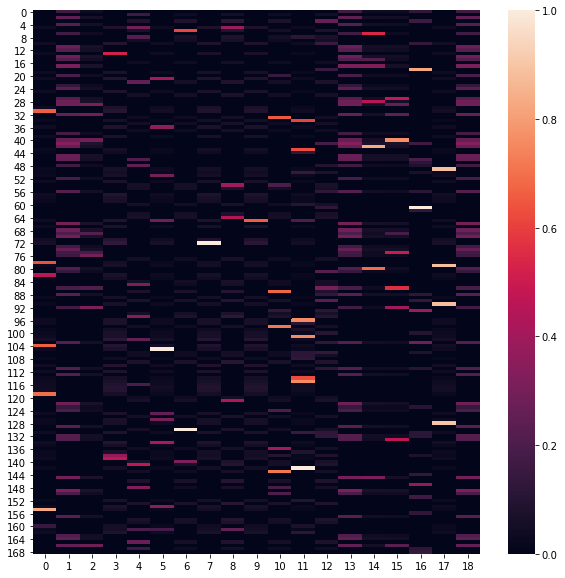

In [327]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(results)

## Sort Recommendations for Each Test Vector ##

In [329]:
# https://stackoverflow.com/questions/66679020/python-quickest-way-to-sort-list-and-keep-indexes
#list(enumerate(results[:,0]))

In [330]:
recommendations = np.argsort(results[:,5])[:-10:-1]
recommendations

array([105, 134,  21,  36, 154, 127,  51,  65, 125])

In [331]:
test_keywords[5]

(179, ['america', 'england', 'poetry', 'new', 'early', 'hhdre'])

In [332]:
rec_list = []
for rec in recommendations:
    print(training_keywords[rec])
    rec_list.append(training_keywords[rec])

(119, ['america', 'england', 'poetry', 'new', 'early', 'hhdre'])
(85, ['whitman', 'poetry', 'america', 'hhdre'])
(171, ['poetry', 'america', 'modernism', 'hhdre'])
(93, ['whitman', 'poetry', 'america', 'walt', 'hhdre'])
(77, ['poetry', 'america', 'emily', 'dickinson', 'hhdre'])
(164, ['america', 'aftermath', 'poetry', 'war', 'civil', 'hhdre'])
(103, ['america', '1700-1850', 'american', 'poetry', 'nature', 'nation', 'hhdre'])
(28, ['new', 'national', 'culture', 'hhdre'])
(78, ['paul', 'letters', 'christianity', 'early', 'hhdre'])


In [333]:
test_df.loc[179]

Institution                                                    HarvardX
Course Number                                                   AMPOx.1
Course Title          Poetry in America: The Poetry of Early New Eng...
Instructors                                 [Frank Bentley, Ed Barrett]
Course Subject        Humanities, History, Design, Religion, and Edu...
certification_rate                                                 5.44
subj_codes                                                        hhdre
title_and_subject         [america, england, poetry, new, early, hhdre]
Name: 179, dtype: object

In [335]:
#[train_df.loc[rec[0]] for rec in rec_list]

In [337]:
test_keywords[0]

(176,
 ['6-11',
  'hero',
  'hours',
  'iconography',
  'ancient',
  'epic',
  '24',
  'signs',
  'greek',
  'hhdre'])

In [338]:
test_df.loc[176]

Institution                                                    HarvardX
Course Number                                                   HUM2.2x
Course Title          The Ancient Greek Hero in 24 Hours (Hours 6-11...
Instructors                                         [Eugene Fitzgerald]
Course Subject        Humanities, History, Design, Religion, and Edu...
certification_rate                                                22.15
subj_codes                                                        hhdre
title_and_subject     [6-11, hero, hours, iconography, ancient, epic...
Name: 176, dtype: object

In [339]:
recommendations = np.argsort(results[:,0])[:-10:-1]
recommendations

array([155, 119,  31, 104,  78,  82, 160,  72, 102])

In [340]:
rec_list = []
for rec in recommendations:
    print(training_keywords[rec], train_df.loc[training_keywords[rec][0], "Course Number"])
    rec_list.append(training_keywords[rec])

(130, ['hero', 'hours', 'ancient', '1-5', 'epic', '24', 'lyric', 'greek', 'hhdre']) HUM2.1x
(66, ['hero', 'hours', 'ancient', '24', '16-21', 'tragedy', 'greek', 'hhdre']) HUM2.4x
(132, ['hero', 'ancient', 'greek', 'hhdre']) CB22.1x
(160, ['hero', 'ancient', 'greek', 'hhdre']) CB22x
(122, ['hero', 'hours', 'cult', 'ancient', 'heroes', '24', 'greek', '12-15', 'hhdre']) HUM2.3x
(175, ['hero', 'beyond', 'ancient', 'plato', 'greek', 'hhdre']) HUM2.5x
(150, ['hours', 'art', 'devotion', 'book', 'middle', 'later', 'ages', 'history', 'medieval', 'hhdre']) HUM1.8x
(25, ['justice', 'hhdre']) ER22x
(15, ['global', 'architecture', 'hhdre']) 4.605x


# CB PIPELINE #

In [341]:
test_user1 = {
    "subject": "",
    "keywords": []
}

test_user2 = {
    "subject": "hhdre",
    "keywords": []
}

test_user3 = {
    "subject": "cs",
    "keywords": ["python", "programming", "introduction"]
}


In [342]:
# no data available

def CB_recommender(user, df=CB_df):
    
    # Case 1: No information from user
    if (user["subject"]=="" and len(user["keywords"])==0):
               
        # Filter dataframe in accordance with completion rates
        filtered_df = df.sort_values(by="% Certified", ascending=False)[:10]
    
        return filtered_df

    # Case 2: Subject Information Only
    elif (user["subject"]!="" and len(user["keywords"])==0):
        # consider including try statement
        filtered_df = df.loc[[user["subject"] in keywords for keywords in df["title_and_subject"]]]
        
        return filtered_df.sort_values(by="certification_rate", ascending=False)[:10]
    
    # Case 3: Subject and Keywords
    else:
        
        # Combine keywords and subject and run search on combined list
        tokens = user["keywords"]
        if (user["subject"]!=""):
            tokens.append(user["subject"])
        
        
        cosine_similarities = keyword_search(tokens)
        print(cosine_similarities)
        # encode and measure cosine similarity
        return np.argsort(cosine_similarities)[:-10:-1]

    
def keyword_search (query, encoded_course_matrix=tfidf):
    
    query_vec = encode_query(query)
#     print(query_vec)
    
    res_vec = np.zeros(encoded_course_matrix.shape[0])
    
    for i,course_vec in enumerate(encoded_course_matrix):
        res_vec[i] = cosine_similarity(course_vec, query_vec)[0][0] # store value only 
    
    return res_vec

def encode_query (keywords, vectorizer = vectorizer):
    
    return vectorizer.transform([keywords])

In [343]:
x = np.zeros(tfidf.shape[0])
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [344]:
tfidf.shape

(169, 419)

In [345]:
CB_df.columns

Index(['Institution', 'Course Number', 'Course Title', 'Instructors',
       'Course Subject', 'certification_rate', 'subj_codes',
       'title_and_subject'],
      dtype='object')

In [346]:
CB_recommender(test_user1, df)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
98,HarvardX,SW12.9x,11/20/2014,Communist Liberations,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",3,4248,1835,1442,43.24,33.98,79.76,30.14,50.49,9.76,37.0,67.11,32.89,82.98
89,HarvardX,SW12.8x,10/09/2014,Creating China: The Birth of a Nation,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",3,4515,2081,1528,46.13,33.87,78.36,31.46,51.05,9.54,37.0,64.33,35.67,82.68
74,HarvardX,SW12.7x,09/04/2014,"Invasions, Rebellions, and the end of Imperial...","Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",3,4662,2148,1505,46.10,32.30,80.08,33.98,52.26,8.68,38.0,63.87,36.13,82.25
56,HarvardX,SW12.5x,04/24/2014,From Global Empire to Global Economy,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",2,5256,2649,1686,50.44,32.10,75.32,28.69,48.95,9.09,35.0,64.35,35.65,82.04
59,HarvardX,SW12.6x,05/22/2014,The Last Empire,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",2,5446,2244,1637,41.24,30.09,76.75,24.22,49.72,11.70,35.0,60.97,39.03,80.56
39,HarvardX,SW12.3x,02/13/2014,Cosmopolitan Tang: Aristocratic Culture,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",2,7422,3221,2226,43.43,30.01,77.16,29.14,50.29,8.99,34.0,58.97,41.03,79.40
174,HarvardX,HUM1.7x,09/21/2015,"History of the Book: Monasteries, Schools, and...",Beverly Kienzle,"Humanities, History, Design, Religion, and Edu...",4,670,364,191,54.33,28.51,64.93,7.01,28.51,8.25,39.0,44.76,55.24,77.52
101,HarvardX,1368.3x,01/05/2015,"Saving Schools: History, Politics, and Policy ...",Paul Peterson,"Humanities, History, Design, Religion, and Edu...",3,1483,641,400,43.25,26.99,64.51,12.75,49.73,4.67,34.0,46.56,53.44,80.97
87,HarvardX,HUM2.3x,10/08/2014,The Ancient Greek Hero in 24 Hours (Hours 12-1...,Gregory Nagy,"Humanities, History, Design, Religion, and Edu...",3,1559,697,417,44.85,26.83,43.18,2.90,33.72,1.77,34.0,50.35,49.65,66.91
48,HarvardX,SW12.4x,03/20/2014,A New National Culture,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",2,6753,2552,1788,37.81,26.49,76.01,22.71,45.74,11.42,34.0,60.51,39.49,80.78


In [347]:
# filter df based on whether subject is in list
CB_df.loc[["hhdre" in keywords for keywords in CB_df["title_and_subject"]]]

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate,subj_codes,title_and_subject
8,HarvardX,VJx,Visualizing Japan (1850s-1930s): Westernizatio...,"[John W. Dower, Andrew Gordon, John Dower, Shi...","Humanities, History, Design, Religion, and Edu...",11.416667,hhdre,"[protest, modernity, westernization, visualizi..."
15,MITx,4.605x,Global Architecture,[Mark Jarzombek],"Humanities, History, Design, Religion, and Edu...",8.366667,hhdre,"[global, architecture, hhdre]"
19,HarvardX,GSE3x,Introduction to Data Wise: A Collaborative Pro...,[Kathryn Parker Boudett],"Humanities, History, Design, Religion, and Edu...",6.135000,hhdre,"[data, improve, wise, process, learning, intro..."
22,HarvardX,SW12.5x,From Global Empire to Global Economy,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",23.210000,hhdre,"[economy, global, empire, hhdre]"
24,HarvardX,SW12.3x,Cosmopolitan Tang: Aristocratic Culture,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",21.315000,hhdre,"[culture, tang, aristocratic, cosmopolitan, hh..."
...,...,...,...,...,...,...,...,...
173,HarvardX,1368.3x,"Saving Schools: History, Politics, and Policy ...",[Bill Aulet],"Humanities, History, Design, Religion, and Edu...",26.990000,hhdre,"[national, saving, politics, accountability, e..."
175,HarvardX,HUM2.5x,The Ancient Greek Hero: Plato and Beyond,[Collaborative],"Humanities, History, Design, Religion, and Edu...",16.680000,hhdre,"[hero, beyond, ancient, plato, greek, hhdre]"
176,HarvardX,HUM2.2x,The Ancient Greek Hero in 24 Hours (Hours 6-11...,[Eugene Fitzgerald],"Humanities, History, Design, Religion, and Edu...",22.150000,hhdre,"[6-11, hero, hours, iconography, ancient, epic..."
179,HarvardX,AMPOx.1,Poetry in America: The Poetry of Early New Eng...,"[Frank Bentley, Ed Barrett]","Humanities, History, Design, Religion, and Edu...",5.440000,hhdre,"[america, england, poetry, new, early, hhdre]"


In [348]:
CB_recommender(test_user2)

,Institution,Course Number,Course Title,Instructors,Course Subject,certification_rate,subj_codes,title_and_subject
79,HarvardX,HUM1.7x,"History of the Book: Monasteries, Schools, and...","[Simona Socrate, Alexie Kolpak]","Humanities, History, Design, Religion, and Edu...",28.51,hhdre,"[transitional, book, schools, introduction, no..."
173,HarvardX,1368.3x,"Saving Schools: History, Politics, and Policy ...",[Bill Aulet],"Humanities, History, Design, Religion, and Edu...",26.99,hhdre,"[national, saving, politics, accountability, e..."
122,HarvardX,HUM2.3x,The Ancient Greek Hero in 24 Hours (Hours 12-1...,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",26.83,hhdre,"[hero, hours, cult, ancient, heroes, 24, greek..."
110,HarvardX,1368.4x,"Saving Schools: History, Politics, and Policy ...",[Mark Drela],"Humanities, History, Design, Religion, and Edu...",25.96,hhdre,"[saving, politics, education, schools, policy,..."
161,HarvardX,GOV1368.3x,"Saving Schools: History, Politics, and Policy ...",[Tarun Khanna],"Humanities, History, Design, Religion, and Edu...",25.81,hhdre,"[national, saving, politics, accountability, e..."
87,HarvardX,GOV1368.2x,"Saving Schools: History, Politics, and Policy ...",[Mark Jarzombek],"Humanities, History, Design, Religion, and Edu...",25.64,hhdre,"[saving, politics, policies, education, school..."
46,HarvardX,SW12.7x,"Invasions, Rebellions, and the end of Imperial...","[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",24.85,hhdre,"[rebellions, invasions, china, imperial, end, ..."
158,HarvardX,1368.2x,"Saving Schools: History, Politics, and Policy ...",[Elisa New],"Humanities, History, Design, Religion, and Edu...",23.86,hhdre,"[saving, politics, policies, education, school..."
63,HarvardX,SW12.8x,Creating China: The Birth of a Nation,"[Peter Bol, Bill Kirby]","Humanities, History, Design, Religion, and Edu...",23.57,hhdre,"[china, birth, creating, nation, hhdre]"
66,HarvardX,HUM2.4x,The Ancient Greek Hero in 24 Hours (Hours 16-2...,[Khurram Afridi],"Humanities, History, Design, Religion, and Edu...",23.37,hhdre,"[hero, hours, ancient, 24, 16-21, tragedy, gre..."


In [351]:
#CB_recommender(test_user3)

In [353]:
#recs = CB_recommender(test_user3)
#recs

In [354]:
# for rec in recs:
#     print(training_keywords[rec], train_df.loc[training_keywords[rec][0], "Course Number"])

In [355]:
# test_user4 = {
#     "subject": "",
#     "keywords": ["inroduction", "mobile", "computation"]
# }
# recs = CB_recommender(test_user4)
# recs

In [211]:
for rec in recs:
    print(training_keywords[rec], train_df.loc[training_keywords[rec][0], "Course Number"])

(157, ['computer', 'computation', 'structures', 'architecture', 'cs']) 6.004.2x
(64, ['digital', 'computation', 'structures', 'circuits', 'cs']) 6.004.1x
(17, ['experiences', 'mobile', 'building', 'cs']) 21W.789x
(128, ['design', 'app', 'application', 'mobile', 'experiences', 'cs']) 21W.789.2x
(184, ['building', 'application', 'apps', 'mobile', 'experiences', 'cs']) 21W.789.3x
(102, ['understanding', 'application', 'mobile', 'experiences', 'use', 'cs']) 21W.789.4x
(138, ['research', 'findings', 'application', 'mobile', 'reporting', 'experiences', 'cs']) 21W.789.5x
(103, ['america', '1700-1850', 'american', 'poetry', 'nature', 'nation', 'hhdre']) AMPOx.2
(100, ['fantastique', 'nights', 'symphonie', 'first', 'hhdre']) MUS24.4x


In [356]:
# test_user5 = {
#     "subject": "",
#     "keywords": ["python", "programming", "education"]
# }
# recs = CB_recommender(test_user4)
# recs

In [213]:
for rec in recs:
    print(training_keywords[rec], train_df.loc[training_keywords[rec][0], "Course Number"])

(157, ['computer', 'computation', 'structures', 'architecture', 'cs']) 6.004.2x
(64, ['digital', 'computation', 'structures', 'circuits', 'cs']) 6.004.1x
(17, ['experiences', 'mobile', 'building', 'cs']) 21W.789x
(128, ['design', 'app', 'application', 'mobile', 'experiences', 'cs']) 21W.789.2x
(184, ['building', 'application', 'apps', 'mobile', 'experiences', 'cs']) 21W.789.3x
(102, ['understanding', 'application', 'mobile', 'experiences', 'use', 'cs']) 21W.789.4x
(138, ['research', 'findings', 'application', 'mobile', 'reporting', 'experiences', 'cs']) 21W.789.5x
(103, ['america', '1700-1850', 'american', 'poetry', 'nature', 'nation', 'hhdre']) AMPOx.2
(100, ['fantastique', 'nights', 'symphonie', 'first', 'hhdre']) MUS24.4x


# DEFINE INITIAL TESTING FUNCTION AND INSPECT RESULTS #

In [357]:
train_df.iloc[145]

Institution                                                        MITx
Course Number                                                    8.MREV
Course Title                                           Mechanics ReView
Instructors                         [David Pritchard, Colin Fredericks]
Course Subject        Science, Technology, Engineering, and Mathematics
certification_rate                                                5.305
subj_codes                                                         stem
title_and_subject                             [review, mechanics, stem]
Name: 26, dtype: object

In [358]:
def test_cosine_similarity (test_set=test_keywords, encoded_course_matrix=tfidf):
   
    # Create matrix to store results
    results = np.empty((tfidf.shape[0], len(test_set)))
    
    # Encode the test set
    test_vecs = [encode_query(keywords[1]) for keywords in  test_set] # encode the second element of the tuple which contains the keywords themselves
    
    # Populate results matrix in accordance with pre-set structure
    for i, course in enumerate(encoded_course_matrix):
        for j,testvec in enumerate(test_vecs):
            results[i][j] = cosine_similarity(course,testvec)[0][0]
    
    return results


def tabulate_results(results, test_set = test_keywords, training_set = training_keywords, encoded_course_matrix=tfidf):
    
    # Loop through each vector in the test_set using the index
    for i in range(results.shape[1]):
        
        # Isolate the measured closeness to all vectors in the course matrix
        top_10_recs = np.argsort(results[:,i])[:-10:-1]
        
        # Output text
        print("-------------------------------------------------------------------------")
        print(f"Test_keywords {i}: ")
        print(test_set[i], test_df.loc[test_set[i][0], "Course Number"],test_df.loc[test_set[i][0], "Institution"])
        
        print("\nRecommendations:")
        for rec in top_10_recs:
#             print(rec)
            print(training_set[rec], train_df.iloc[rec, 1]) #, train_df.loc[rec, "Course Number"], train_df.loc[rec, "Institution"])
                                                                                           
                                                                                           
#         print(training_keywords[rec], train_df.loc[training_keywords[rec][0], "Course Number"]
        
        
        
#         print(results[:, i].shape)

In [359]:
test_df.loc[test_keywords[0][0], "Course Number"]

'HUM2.2x'

In [360]:
# resuts = test_cosine_similarity()
# results[:5, :5]

In [218]:
results.shape

(169, 19)

In [219]:
results

array([[0.        , 0.16413896, 0.03900423, ..., 0.12482029, 0.        ,
        0.16413896],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.24883757, 0.05913111, ..., 0.        , 0.        ,
        0.24883757],
       ...,
       [0.        , 0.2524339 , 0.27785043, ..., 0.        , 0.        ,
        0.2524339 ],
       [0.        , 0.        , 0.        , ..., 0.11398308, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14007201, 0.        ,
        0.        ]])

In [361]:
tabulate_results(results)

-------------------------------------------------------------------------
Test_keywords 0: 
(176, ['6-11', 'hero', 'hours', 'iconography', 'ancient', 'epic', '24', 'signs', 'greek', 'hhdre']) HUM2.2x HarvardX

Recommendations:
(130, ['hero', 'hours', 'ancient', '1-5', 'epic', '24', 'lyric', 'greek', 'hhdre']) HUM2.1x
(66, ['hero', 'hours', 'ancient', '24', '16-21', 'tragedy', 'greek', 'hhdre']) HUM2.4x
(132, ['hero', 'ancient', 'greek', 'hhdre']) CB22.1x
(160, ['hero', 'ancient', 'greek', 'hhdre']) CB22x
(122, ['hero', 'hours', 'cult', 'ancient', 'heroes', '24', 'greek', '12-15', 'hhdre']) HUM2.3x
(175, ['hero', 'beyond', 'ancient', 'plato', 'greek', 'hhdre']) HUM2.5x
(150, ['hours', 'art', 'devotion', 'book', 'middle', 'later', 'ages', 'history', 'medieval', 'hhdre']) HUM1.8x
(25, ['justice', 'hhdre']) ER22x
(15, ['global', 'architecture', 'hhdre']) 4.605x
-------------------------------------------------------------------------
Test_keywords 1: 
(166, ['environmental', 'within', 'con

In [221]:
train_df.iloc[125]

Institution                                                    HarvardX
Course Number                                                HDS1544.1x
Course Title                    Early Christianity: The Letters of Paul
Instructors                                     [Greg Nagy, L.Muellner]
Course Subject        Humanities, History, Design, Religion, and Edu...
certification_rate                                                 4.59
subj_codes                                                        hhdre
title_and_subject           [paul, letters, christianity, early, hhdre]
Name: 78, dtype: object

In [222]:
(30, ['aerodynamics', 'vehicle', 'flight', 'stem'])
(5, ['life', 'biology', 'introduction', 'secret', 'stem'])
(14, ['uncertainty', 'probability', 'introduction', 'science', 'stem'])
(118, ['state', 'control', 'introduction', 'space', 'stem'])
(57, ['feedback', 'theory', 'control', 'introduction', 'stem'])
(31, ['bioconductor', 'introduction', 'ghss'])
(1, ['state', 'chemistry', 'solid', 'introduction', 'stem'])
(7, ['science', 'introduction', 'computer', 'cs'])
(33, ['design', 'introduction', 'game', 'hhdre'])

(33, ['design', 'introduction', 'game', 'hhdre'])

In [223]:
train_df.iloc[145]

Institution                                                        MITx
Course Number                                                    8.MREV
Course Title                                           Mechanics ReView
Instructors                         [David Pritchard, Colin Fredericks]
Course Subject        Science, Technology, Engineering, and Mathematics
certification_rate                                                5.305
subj_codes                                                         stem
title_and_subject                             [review, mechanics, stem]
Name: 26, dtype: object

In [224]:
train_df.loc[145]

Institution                                                        MITx
Course Number                                                     8.01x
Course Title                                        Classical Mechanics
Instructors                                             [Ashish K. Jha]
Course Subject        Science, Technology, Engineering, and Mathematics
certification_rate                                                 5.07
subj_codes                                                         stem
title_and_subject                          [classical, mechanics, stem]
Name: 145, dtype: object

# ANALYSIS OF TEST RESULTS #
* There is still and issue with course-codes, so perhaps the pre-processing stage must be chagned
* Because recommendations are based on title and subject keywords, not all recommendations are direclty relevant
    * however, approaching the CB recommender in this way allows and element of serendipity, which is sometimes desirable
    * one way to improve recommendations would be to include course descriptions and thend o a keyword search based on those
* instructor information and other stats coudl probably be used to complement hte CF recommender

## PRECISION AND RECALL @K ##

In [362]:
# def tabulate_results(results, test_set = test_keywords, training_set = training_keywords, encoded_course_matrix=tfidf):

In [363]:
test_keywords[:5]

[(176,
  ['6-11',
   'hero',
   'hours',
   'iconography',
   'ancient',
   'epic',
   '24',
   'signs',
   'greek',
   'hhdre']),
 (166, ['environmental', 'within', 'constraints', 'energy', 'stem']),
 (125, ['tensor', 'symmetry', 'properties', 'materials', 'structure', 'stem']),
 (62, ['leaders', 'learning', 'hhdre']),
 (155, ['human', 'environmental', 'health', 'change', 'global', 'ghss'])]

In [364]:
training_keywords[:2]

[(39, ['haute', 'cooking', 'science', 'matter', 'soft', 'cuisine', 'stem']),
 (172,
  ['clinical',
   'research',
   'health',
   'numbers',
   'quantitative',
   'public',
   'methods',
   'ghss'])]

In [365]:
results.shape[1]

19

In [368]:
k = 5
stats_at_k = {}

for i in range(results.shape[1]):
        
        # Isolate the measured closeness to all vectors in the course matrix
        top_k_recs = np.argsort(results[:,i])[:-6:-1]
#         print(top_k_recs)
        
        test_subj = test_keywords[i][1][-1]
        print(f"Test subject: {test_subj}")
        
        rec_subj = [training_keywords[rec][1][-1] for rec in top_k_recs]
        print(f"Rec subject: {rec_subj}")
        
        # Calculate accuracy
        count = [1 if test_subj==rec_subj[i] else 0 for i in range(len(top_k_recs))]
        
        stats_at_k[i] = sum(count)
        

Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: stem
Rec subject: ['stem', 'stem', 'stem', 'stem', 'stem']
Test subject: stem
Rec subject: ['stem', 'stem', 'stem', 'stem', 'stem']
Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: ghss
Rec subject: ['ghss', 'ghss', 'ghss', 'ghss', 'hhdre']
Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: ghss
Rec subject: ['ghss', 'ghss', 'ghss', 'ghss', 'ghss']
Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: ghss
Rec subject: ['ghss', 'ghss', 'ghss', 'hhdre', 'hhdre']
Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: ghss
Rec subject: ['ghss', 'ghss', 'ghss', 'ghss', 'ghss']
Test subject: hhdre
Rec subject: ['hhdre', 'hhdre', 'hhdre', 'hhdre', 'hhdre']
Test subject: ghss
Rec subject: ['stem', 'ghss', 'ghss', 'stem', 'stem']
Test subject

In [369]:
stats_at_k

{0: 5,
 1: 5,
 2: 5,
 3: 5,
 4: 4,
 5: 5,
 6: 5,
 7: 5,
 8: 3,
 9: 5,
 10: 5,
 11: 5,
 12: 2,
 13: 5,
 14: 5,
 15: 5,
 16: 4,
 17: 5,
 18: 5}

In [231]:
# https://krishnapullak.medium.com/understanding-precision-recall-and-f-score-at-k-in-recommender-systems-7146a0dce68e

# Precision@K: proportion of relevant items among top K recs
# p@k = # relevant items in top k / k

# Recall@K: ability of recommender to identify all relevant items within top K recs; system comprehensiveness
# r@k = # relevant items in top k / total number of relevant items


# https://neptune.ai/blog/recommender-systems-metrics
# *** https://www.evidentlyai.com/ranking-metrics/precision-recall-at-k ***

In [370]:
precision_at_k = {}

for i in range(len(stats_at_k)):
    precision_at_k[i] = stats_at_k[i]/k
    
precision_at_k

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 0.8,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 0.6,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 0.4,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 0.8,
 17: 1.0,
 18: 1.0}

In [371]:
avg_precision_at_k = sum(precision_at_k.values())/len(precision_at_k)
avg_precision_at_k

0.9263157894736843

In [373]:
k = 5
word_stats_p_at_k = {}
avg_p_at_k = {}

for i in range(results.shape[1]):
        
        # Isolate the measured closeness to all vectors in the course matrix
        top_k_recs = np.argsort(results[:,i])[:-6:-1]
        print(top_k_recs)
        
        test_words = test_keywords[i][1]
        print(f"Test subject: {test_words}, {len(test_words)}")
        
        rec_words = [training_keywords[rec][1] for rec in top_k_recs]
#         print(f"Rec subject: {rec_words}")
        
        word_stats_p_at_k[i] = []
        # https://stackoverflow.com/questions/1388818/how-can-i-compare-two-lists-in-python-and-return-matches
        for rec in rec_words:
            print(f"Set: {set(test_words) & set(rec)}")
            print(rec)
            word_stats_p_at_k[i].append(len(set(test_words) & set(rec))/len(rec))
            
        avg_p_at_k[i] = sum(word_stats_p_at_k[i])/5
        
            
        
        print("-------------------------------------------------------------------------------------------------------")
        # Calculate accuracy
#         count = [1 if test_subj==rec_subj[i] else 0 for i in range(len(top_k_recs))]
        
#         stats_at_k[i] = sum(count)
        

[155 119  31 104  78]
Test subject: ['6-11', 'hero', 'hours', 'iconography', 'ancient', 'epic', '24', 'signs', 'greek', 'hhdre'], 10
Set: {'hero', 'hours', 'hhdre', 'epic', 'ancient', '24', 'greek'}
['hero', 'hours', 'ancient', '1-5', 'epic', '24', 'lyric', 'greek', 'hhdre']
Set: {'hero', 'hours', 'hhdre', 'ancient', '24', 'greek'}
['hero', 'hours', 'ancient', '24', '16-21', 'tragedy', 'greek', 'hhdre']
Set: {'hero', 'hhdre', 'ancient', 'greek'}
['hero', 'ancient', 'greek', 'hhdre']
Set: {'hero', 'hhdre', 'ancient', 'greek'}
['hero', 'ancient', 'greek', 'hhdre']
Set: {'hero', 'hours', 'hhdre', 'ancient', '24', 'greek'}
['hero', 'hours', 'cult', 'ancient', 'heroes', '24', 'greek', '12-15', 'hhdre']
-------------------------------------------------------------------------------------------------------
[ 41 149  17  66 145]
Test subject: ['environmental', 'within', 'constraints', 'energy', 'stem'], 5
Set: {'stem'}
['introduction', 'aerodynamics', 'stem']
Set: {'stem'}
['electronics', 'cir

In [238]:
word_stats_p_at_k

{0: [0.0, 0.0, 0.0, 0.0, 0.0],
 1: [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 2: [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 3: [0.0, 0.0, 0.0, 0.0, 0.0],
 4: [0.0, 0.0, 0.0, 0.0, 0.0],
 5: [0.0, 0.0, 0.0, 0.0, 0.0],
 6: [0.0, 0.0, 0.0, 0.0, 0.0],
 7: [0.0, 0.0, 0.0, 0.0, 0.0],
 8: [0.0, 0.0, 0.0, 0.0, 0.0],
 9: [0.0, 0.0, 0.0, 0.0, 0.0],
 10: [0.0, 0.0, 0.0, 0.0, 0.0],
 11: [0.0, 0.0, 0.0, 0.0, 0.0],
 12: [0.3333333333333333, 0.0, 0.0, 0.0, 0.0],
 13: [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 14: [0.3333333333333333,
  0.3333333333333333,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666],
 15: [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 16: [0.3333333333333333, 0.0, 0.0, 0.0, 0.0],
 17: [0.0, 0.0, 0.0, 

In [272]:
avg_p_at_k

{0: 0.5557142857142857,
 1: 0.4904761904761904,
 2: 0.6876190476190476,
 3: 0.2552525252525253,
 4: 0.3752380952380952,
 5: 0.6557142857142857,
 6: 0.7333333333333333,
 7: 0.7476190476190475,
 8: 0.40453102453102446,
 9: 0.36666666666666664,
 10: 0.45,
 11: 0.5957142857142856,
 12: 0.4688888888888889,
 13: 0.4628571428571428,
 14: 0.5276190476190477,
 15: 0.4121212121212121,
 16: 0.6599999999999999,
 17: 0.96,
 18: 0.4121212121212121}

In [273]:
sum(avg_p_at_k.values())/len(avg_p_at_k)

0.5379729627098048

In [263]:
# Recall@K: ability of recommender to identify all relevant items within top K recs; system comprehensiveness
# r@k = # relevant items in top k / total number of relevant items
# total relevant items: all words in test string
# relevant items in top k = number of common words
# divide by 5 (k) for avg

<function dict.values>

In [274]:
k = 5
word_stats_r_at_k = {}
avg_r_at_k = {}

for i in range(results.shape[1]):
        
        # Isolate the measured closeness to all vectors in the course matrix
        top_k_recs = np.argsort(results[:,i])[:-6:-1]
#         print(top_k_recs)
        
        test_words = test_keywords[i][1]
        print(f"Test subject: {test_words}, {len(test_words)}")
        
        rec_words = [training_keywords[rec][1] for rec in top_k_recs]
#         print(f"Rec subject: {rec_words}")
        
        word_stats_r_at_k[i] = []
        # https://stackoverflow.com/questions/1388818/how-can-i-compare-two-lists-in-python-and-return-matches
        for rec in rec_words:
            print(len(set(test_words) & set(rec)))
            word_stats_r_at_k[i].append(len(set(test_words) & set(rec))/len(test_words))
            
        avg_r_at_k[i] = sum(word_stats_r_at_k[i])/5
#             print(rec)
            
        
        print("-------------------------------------------------------------------------------------------------------")
        # Calculate accuracy
#         count = [1 if test_subj==rec_subj[i] else 0 for i in range(len(top_k_recs))]
        
#         stats_at_k[i] = sum(count)
        

Test subject: ['emily', 'dickinson', 'poetry', 'america', 'hhdre'], 5
3
3
3
3
3
-------------------------------------------------------------------------------------------------------
Test subject: ['mechanics', 'classical', 'stem'], 3
3
2
2
2
2
-------------------------------------------------------------------------------------------------------
Test subject: ['wave', 'mechanics', 'quantum', 'mastering', 'stem'], 5
4
4
4
2
2
-------------------------------------------------------------------------------------------------------
Test subject: ['culture', 'national', 'new', 'hhdre'], 4
2
2
2
2
1
-------------------------------------------------------------------------------------------------------
Test subject: ['american', 'introduction', 'government', 'ghss'], 4
3
2
2
1
1
-------------------------------------------------------------------------------------------------------
Test subject: ['england', 'new', 'america', 'poetry', 'early', 'hhdre'], 6
6
3
3
3
3
---------------------------

In [275]:
word_stats_r_at_k

{0: [0.6, 0.6, 0.6, 0.6, 0.6],
 1: [1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 2: [0.8, 0.8, 0.8, 0.4, 0.4],
 3: [0.5, 0.5, 0.5, 0.5, 0.25],
 4: [0.75, 0.5, 0.5, 0.25, 0.25],
 5: [1.0, 0.5, 0.5, 0.5, 0.5],
 6: [0.75, 0.75, 0.5, 0.75, 0.5],
 7: [0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571,
  0.14285714285714285],
 8: [1.0, 0.25, 0.25, 0.125, 0.125],
 9: [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 10: [1.0,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 11: [1.0, 0.75, 0.75, 0.75, 0.75],
 12: [1.0,
  0.5714285714285714,
  0.2857142857142857,
  0.2857142857142857,
  0.14285714285714285],
 13: [0.8, 0.8, 0.4, 0.6, 0.2],
 14: [1.0, 1.0, 1.0, 0.5, 0.5],
 15: [0.8, 0.8, 0.8, 0.4, 0.4],
 16: [1.0, 0.8, 0.6, 0.4, 0.4],
 17: [1.0,
  0.7272727272727273,
  0.7272727272727273,
  0.7272727272727273,


In [276]:
avg_r_at_k

{0: 0.6,
 1: 0.7333333333333332,
 2: 0.64,
 3: 0.45,
 4: 0.45,
 5: 0.6,
 6: 0.65,
 7: 0.7142857142857142,
 8: 0.35,
 9: 0.3333333333333333,
 10: 0.4666666666666666,
 11: 0.8,
 12: 0.45714285714285713,
 13: 0.56,
 14: 0.8,
 15: 0.64,
 16: 0.6399999999999999,
 17: 0.7818181818181819,
 18: 0.64}

In [278]:
sum(avg_r_at_k.values())/len(avg_r_at_k)

0.5950831624515837